# **Structural Equation Modeling Approach to Interrelation Between Organizational Culture and Employee Behavior**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import semopy
from semopy import Model # SEM
import graphviz
import matplotlib.pyplot as plt
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

This research examines the relationship between **perceived organizational culture** and **employee engagement** as its primary focus. These two constructs serve as the main variables in the model, with organizational **attachment style** and the **need for identification** conceptualized as mediating variables. The analysis explores how employees' psychological dispositions influence the extent to which cultural perceptions affect their level of engagement within the organization.

**Organizational culture** is considered a key factor influencing **employee engagement**, as it defines the system of values, norms, and expectations that **shape behavior** within the organization. However, this influence is not direct — it **is mediated** by employees’ dispositional characteristics, such as their organizational **attachment style** and degree of **identification with the organization**.

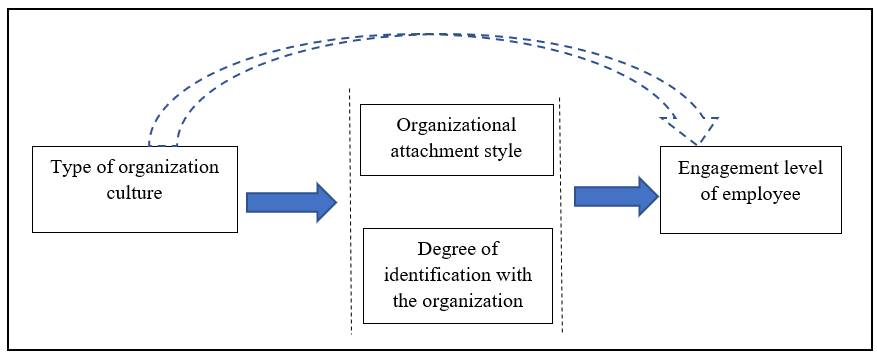

In [2]:
Image(filename='D://survey_data/concept.png')

The conceptual model includes the following components:

* **Organizational Culture**. A system of shared norms, values, and practices that shape how employees interact and work together within the company.

* Dispositional Characteristics of Employees. Individual traits that influence how employees perceive organizational culture, including:

* Organizational **Attachment Style** (secure, anxious, avoidant)
* Organizational **Identification**. The extent to which employees internalize and align with the organization’s values.

* **Employee Engagement**. The degree of emotional, cognitive, and behavioral involvement in organizational activities, reflected in: Initiative – proactive behavior in completing work tasks. Commitment – willingness to go above and beyond for the organization’s success. Enthusiasm – emotional connection to and passion for one’s work.

# **Research Methods**

The primary method of empirical data collection was **a survey**. Participants were invited to complete an online questionnaire, which included four standardized instruments, each accompanied by clear instructions:
* Employee Engagement. Measured using the ECOPSY model questionnaire
* Organizational Culture. Assessed through a typology-based questionnaire designed to identify the perceived type of organizational culture
* Organizational Attachment Style. Measured using the methodology developed by F. Scrima and colleagues
* Need for Identification. Assessed using the scale developed by M. Mayhew and colleagues (Mayhew et al.)

# Sample Description

A **convenience sampling method** was used for this study, based on the accessibility of respondents. A total of **142 participants**, both male and female, took part in the research. Participants ranged in age from **22 to 64 years**, with a **median age of 44**.

- **Gender distribution**:
  - Female: **62.7%**
  - Male: **37.3%**

- **Education**:
  - Higher education: **73.9%**

- **Work experience**:
  - Over 10 years: **86.6%**

- **Industry sectors**:
  - Other: most frequent response
  - Services: **24.6%**
  - Manufacturing: **18.3%**

- **Type of organization**:
  - Commercial (for-profit): **65.7%**


In [3]:
data = pd.read_excel("D://survey_data/research_data.xlsx")

In [4]:
data.head()

,engagement,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory,attachment_safe,attachment_avoidant,attachment_ambivalent,belongingness,self_definition
0,3.716667,4,2,4,2,3.500000,2.2,2.166667,25,20
1,3.566667,4,2,2,4,3.333333,2.4,2.166667,20,19
2,3.400000,4,6,2,0,4.666667,4.6,4.333333,21,28
3,4.366667,6,0,5,1,3.000000,4.0,3.166667,14,11
4,3.950000,3,3,2,4,3.666667,2.0,2.000000,19,15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   engagement               142 non-null    float64
 1   culture_organic          142 non-null    int64  
 2   culture_bureaucratic     142 non-null    int64  
 3   culture_entrepreneurial  142 non-null    int64  
 4   culture_participatory    142 non-null    int64  
 5   attachment_safe          142 non-null    float64
 6   attachment_avoidant      142 non-null    float64
 7   attachment_ambivalent    142 non-null    float64
 8   belongingness            142 non-null    int64  
 9   self_definition          142 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 11.2 KB


### 🧾 Survey Dataset Overview

The dataset consists of **142 responses** collected through an online survey. It includes **10 variables** measuring employee engagement, perceived organizational culture, attachment styles, and identification with the organization.

#### 📊 Variables:

| Column Name                 | Description                                                                 | Type     |
|----------------------------|-----------------------------------------------------------------------------|----------|
| `engagement`               | Overall employee engagement score                                           | float64  |
| `culture_organic`          | Perception of an organic (flexible, people-oriented) organizational culture | int64    |
| `culture_bureaucratic`     | Perception of a bureaucratic (formal, rule-based) culture                   | int64    |
| `culture_entrepreneurial`  | Perception of an entrepreneurial (innovative, risk-taking) culture          | int64    |
| `culture_participatory`    | Perception of a participatory (inclusive, collaborative) culture            | int64    |
| `attachment_safe`          | Secure attachment to the organization                                       | float64  |
| `attachment_avoidant`      | Avoidant attachment to the organization                                     | float64  |
| `attachment_ambivalent`    | Ambivalent (anxious) attachment to the organization                         | float64  |
| `belongingness`            | Sense of belonging or connection with the organization                      | int64    |
| `self_definition`          | Degree of self-definition based on organizational values                    | int64    |

#### 🧠 Notes:

- Data types include both **continuous** (`float64`) and **ordinal/discrete** (`int64`) values.
- All columns have **no missing values**.
- The dataset is ready for **Confirmatory Factor Analysis (CFA)** and **Structural Equation Modeling (SEM)**.



In [6]:
data.describe()

,engagement,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory,attachment_safe,attachment_avoidant,attachment_ambivalent,belongingness,self_definition
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,3.613498,4.028169,2.922535,2.922535,2.126761,3.159624,2.908451,2.530516,18.943662,18.957746
std,0.760638,2.509397,1.770819,1.539429,1.448203,0.635771,0.772441,0.753406,4.232221,6.159664
min,1.533333,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,6.000000
25%,3.116667,2.000000,2.000000,2.000000,1.000000,2.833333,2.400000,2.000000,16.250000,15.000000
50%,3.683333,4.000000,3.000000,3.000000,2.000000,3.166667,2.900000,2.500000,20.000000,20.000000
75%,4.083333,5.000000,4.000000,4.000000,3.000000,3.500000,3.400000,3.000000,22.000000,23.000000
max,5.000000,12.000000,10.000000,7.000000,6.000000,4.666667,4.600000,4.833333,25.000000,30.000000


### 🧾 Conclusion

The descriptive statistics reveal several key insights into the structure and tendencies of the sample:

- **Employee engagement** levels are moderately high on average (**mean = 3.61** out of 5), with relatively low variability, suggesting a generally engaged workforce.
- Among the different **types of organizational culture**, the **organic culture** is most strongly perceived (**mean = 4.03**), while **participatory culture** is the least represented (**mean = 2.13**).
- Participants tend to exhibit higher levels of **secure attachment** to the organization (**mean = 3.16**) compared to **avoidant** and **ambivalent** attachment styles.
- Both **belongingness** (**mean = 18.94** out of 25) and **self-definition** (**mean = 18.96** out of 30) suggest a moderate to strong psychological connection with the organization.

These findings provide a solid foundation for further analysis using **Structural Equation Modeling (SEM)** to examine how organizational culture types and dispositional characteristics influence employee engagement — both directly and through **mediating variables**.


# Correlations

In [7]:
data.corr()

,engagement,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory,attachment_safe,attachment_avoidant,attachment_ambivalent,belongingness,self_definition
engagement,1.000000,-0.015249,0.189984,-0.047959,-0.154904,0.417029,-0.324640,-0.094540,0.549104,0.328197
culture_organic,-0.015249,1.000000,-0.521403,-0.539189,-0.522056,0.113483,0.185015,0.087073,0.052906,0.136351
culture_bureaucratic,0.189984,-0.521403,1.000000,-0.166120,-0.142717,0.048858,-0.086106,0.054058,0.097831,0.023755
culture_entrepreneurial,-0.047959,-0.539189,-0.166120,1.000000,0.074422,-0.109257,-0.150341,-0.057058,-0.031154,-0.140212
culture_participatory,-0.154904,-0.522056,-0.142717,0.074422,1.000000,-0.140242,-0.055488,-0.156324,-0.178182,-0.116268
attachment_safe,0.417029,0.113483,0.048858,-0.109257,-0.140242,1.000000,-0.078344,-0.011887,0.432122,0.330434
attachment_avoidant,-0.324640,0.185015,-0.086106,-0.150341,-0.055488,-0.078344,1.000000,0.554455,-0.177313,0.058209
attachment_ambivalent,-0.094540,0.087073,0.054058,-0.057058,-0.156324,-0.011887,0.554455,1.000000,-0.140326,0.121776
belongingness,0.549104,0.052906,0.097831,-0.031154,-0.178182,0.432122,-0.177313,-0.140326,1.000000,0.619376
self_definition,0.328197,0.136351,0.023755,-0.140212,-0.116268,0.330434,0.058209,0.121776,0.619376,1.000000


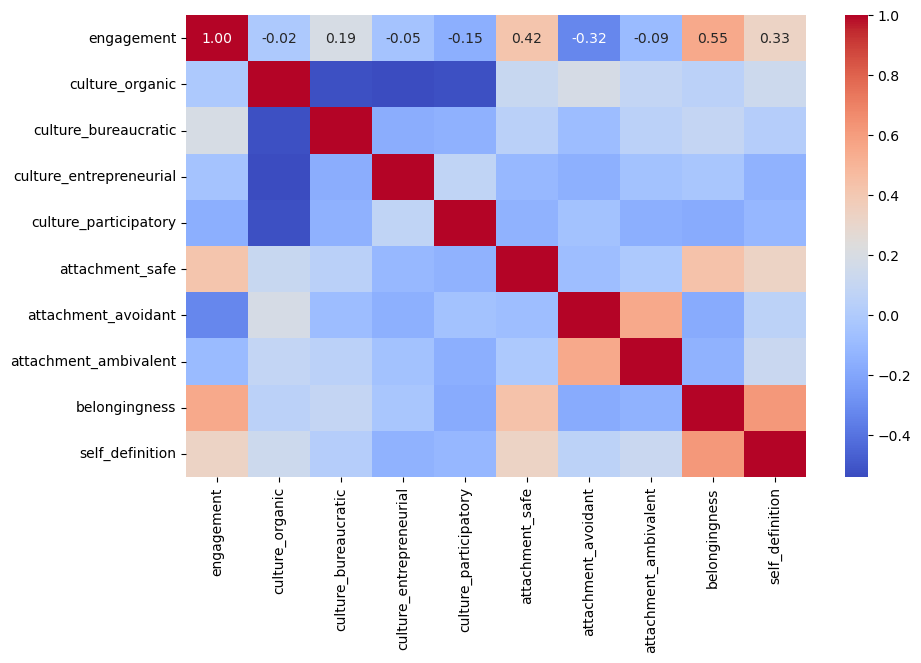

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### 📌 Correlation Analysis: Conclusion

The Pearson correlation matrix reveals several meaningful relationships between employee engagement, organizational culture types, attachment styles, and identification variables:

- **Employee engagement** is:
  - **positively correlated** with:
    - **Attachment (safe)** (**r = 0.42**)
    - **Belongingness** (**r = 0.55**)
    - **Self-definition** (**r = 0.33**)
  - **negatively correlated** with:
    - **Attachment (avoidant)** (**r = -0.32**)
    - **Culture (participatory)** (**r = -0.15**)

- **Safe attachment** shows strong positive correlations with:
  - **Belongingness** (**r = 0.43**)
  - **Self-definition** (**r = 0.33**)

- **Avoidant and ambivalent attachments** are strongly **positively correlated with each other** (**r = 0.55**), but both are **negatively associated** with **belongingness** and **engagement**.

- The **organic culture type** is:
  - Negatively correlated with bureaucratic (**r = -0.52**), entrepreneurial (**r = -0.54**), and participatory (**r = -0.52**) cultures
  - Weakly and inconsistently associated with other variables

- **Belongingness and self-definition** are **strongly correlated** (**r = 0.62**) and show the **strongest links to engagement**, suggesting their central role as mediators.

### 🧠 Summary Insight

The results support the theoretical assumption that **employee engagement is strongly linked to dispositional characteristics**, especially **secure attachment**, **sense of belonging**, and **identification with the organization**. The role of perceived **organizational culture** is more nuanced and may exert its influence indirectly, via these mediators.

These findings lay the groundwork for testing a **mediated SEM model**, where attachment style and identification act as pathways through which organizational culture influences engagement.


# OLS regression result

In [9]:
X = data[['culture_organic', 'culture_bureaucratic', 'culture_entrepreneurial', 'culture_participatory']]
y = data['engagement']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             engagement   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.567
Date:                Fri, 02 May 2025   Prob (F-statistic):             0.0570
Time:                        17:25:35   Log-Likelihood:                -158.28
No. Observations:                 142   AIC:                             324.6
Df Residuals:                     138   BIC:                             336.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0962      0.002     48.177      0.000       0.092       0.100
culture_organic             0.2887      0.018     16.445      0.000       0.254       0.323
culture_bureaucratic        0.3616      0.028     12.823      0.000       0.306       0.417
culture_entrepreneurial     0.2837      0.033      8.508      0.000       0.218       0.350
culture_participatory       0.2204      0.039      5.702      0.000       0.144       0.297
==============================================================================
Omnibus:                        4.563   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.313
Skew:                          -0.367   Prob(JB):                        0.116
Kurtosis:                       2.565   Cond. No.                     6.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 📊 OLS Regression Results: Conclusion

The multiple linear regression model examined the relationship between **employee engagement** and four types of **perceived organizational culture**.

#### 🔍 Key Findings:

- The model explains approximately **5.3% of the variance** in employee engagement (**R² = 0.053**), which is relatively low.
- The overall model is **marginally non-significant** at the 0.05 level (**p = 0.057**), indicating weak explanatory power as a whole.
- Despite the modest overall model fit, **all individual predictors are statistically significant (p < 0.001)**, suggesting they each contribute to engagement independently:
  - `culture_bureaucratic` (**β = 0.36**) had the **strongest positive effect**.
  - Followed by `culture_organic` (**β = 0.29**), `culture_entrepreneurial` (**β = 0.28**), and `culture_participatory` (**β = 0.22**).
- All coefficients are **positive**, indicating that higher perceptions of any culture type are associated with **greater employee engagement**.

#### 📌 Interpretation:

While the model's **overall predictive power is limited**, the results suggest that employees who perceive **structure, innovation, inclusivity, and flexibility** in their organizational culture tend to report higher engagement levels. However, the low R² indicates that **additional psychological or interpersonal factors** (e.g., attachment styles, identification, leadership) likely play a critical role and should be included in a broader **SEM framework**.

These findings justify moving beyond OLS to **Structural Equation Modeling**, where **mediators** like **secure attachment** and **organizational identification** can be formally tested.


# Structural Equation Modeling Approach to Organizational Culture and Employee Behavior

## 🧠 Conceptual Framework

This project applies a **Structural Equation Modeling (SEM)** approach to investigate how **perceived organizational culture** influences **employee behavior**, with a focus on **employee engagement** as the behavioral outcome.

### 🔍 Key Concepts

- **Organizational Culture** refers to the shared values, norms, and practices perceived by employees within an organization. These cultural perceptions are hypothesized to shape employee attitudes and behaviors.

- **Employee Engagement** is understood as a multidimensional construct that includes emotional, cognitive, and behavioral involvement in one's work. It is influenced not only by structural or external factors but also by internal psychological processes.

- **Dispositional Mediators** such as:
  - **Attachment styles** (secure, avoidant, ambivalent)
  - **Need for belonging** and **self-definition**  
  are theorized to **mediate the relationship** between organizational culture and engagement.

### 🧭 Analytical Strategy

SEM is used to test both:
- **Direct paths** from perceived organizational culture types to employee engagement
- **Indirect (mediated) paths** through psychological variables (attachment and identification)

This allows for:
- Modeling of **observed constructs** (e.g., culture, engagement)
- Modeling of **latent constructs (mediating variables)** (e.g., attachment styles, belonging,  self-definition)
- Assessment of **measurement quality**
- Simultaneous estimation of **complex relationships** among observed and latent variables

The use of SEM provides a robust framework for capturing how organizational culture is **internalized by employees** and how it translates into **engaged workplace behavior** through deeper psychological mechanisms.


## 📐 Path Analysis Model: Direct and Mediated Effects

In this step, we specified a **path analysis model** to examine how different **types of perceived organizational culture** influence **employee engagement**, both directly and through **psychological mediators**.

### 🔧 Model Structure

The model includes the following pathways:

1. **Direct effects of organizational culture on engagement**  
   Each of the four culture types (`culture_organic`, `culture_bureaucratic`, `culture_entrepreneurial`, `culture_participatory`) is modeled as a direct predictor of `engagement`.

2. **Effects of culture on attachment styles**  
   All four culture types are modeled as predictors of:
   - `attachment_safe`
   - `attachment_avoidant`
   - `attachment_ambivalent`

3. **Effects of culture on identification variables**  
   Culture types also predict:
   - `belongingness`
   - `self_definition`

4. **Mediated effects on engagement**  
   Engagement is modeled as an outcome of:
   - All three attachment styles
   - Both identification variables

### 🎯 Purpose

This structure allows us to test:
- Whether **organizational culture has a direct impact on engagement**, or
- Whether that influence is **mediated** through **attachment styles** and the **need for identification**.

This model provides a clear framework for evaluating the **psychological mechanisms** through which organizational culture is internalized and translated into employee behavior.



In [10]:
# Define the path model (Path Analysis)

model_desc = """
    # Direct effect of organizational culture types on engagement
    engagement ~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory

    # Effect of organizational culture on attachment styles
    attachment_safe ~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
    attachment_avoidant ~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
    attachment_ambivalent ~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory

    # Effect of organizational culture on need for identification
    belongingness ~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
    self_definition ~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory

    # Effect of attachment styles and identification on engagement
    engagement ~ attachment_safe + attachment_avoidant + attachment_ambivalent + belongingness + self_definition
"""


After that we build the model and fit it with semopy:

In [11]:
model = Model(model_desc)
model.fit(data)

SolverResult(fun=1.1842980473785474, success=True, n_it=51, x=array([-3.87479746e-03,  3.80161045e-02, -1.98726466e-02, -2.24716265e-02,
        2.46299521e-01, -2.96358433e-01,  1.20223520e-01,  7.30309853e-02,
        6.78120836e-05,  1.43817963e-02,  1.94146507e-02, -2.58139249e-02,
       -4.32056693e-02,  3.14106241e-02, -2.20696367e-02, -5.20763258e-02,
       -9.75411661e-04,  1.20072341e-02,  2.29856434e-02, -8.41686050e-03,
       -6.59025610e-02,  3.23359281e-02,  2.07028061e-01,  1.39342927e-02,
       -4.57246561e-01,  1.41614287e-01,  9.25077397e-02, -3.98562352e-01,
       -3.17465886e-01,  5.48455190e-01,  5.69578820e-01,  3.89560914e-01,
        1.71267851e+01,  3.32597511e-01,  3.64884459e+01]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [12]:
# show results
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,attachment_safe,~,culture_organic,0.014382,0.141772,0.101443,9.191985e-01
1,attachment_safe,~,culture_bureaucratic,0.019415,0.143037,0.135732,8.920334e-01
2,attachment_safe,~,culture_entrepreneurial,-0.025814,0.144157,-0.179068,8.578844e-01
3,attachment_safe,~,culture_participatory,-0.043206,0.144698,-0.298593,7.652509e-01
4,attachment_avoidant,~,culture_organic,0.031411,0.171427,0.183231,8.546171e-01
5,attachment_avoidant,~,culture_bureaucratic,-0.022070,0.172957,-0.127602,8.984639e-01
6,attachment_avoidant,~,culture_entrepreneurial,-0.052076,0.174311,-0.298755,7.651271e-01
7,attachment_avoidant,~,culture_participatory,-0.000975,0.174965,-0.005575,9.955519e-01
8,attachment_ambivalent,~,culture_organic,0.012007,0.168218,0.071379,9.430961e-01
9,attachment_ambivalent,~,culture_bureaucratic,0.022986,0.169719,0.135433,8.922693e-01


In [13]:
sem_results = model.inspect()

In [14]:
# Formatting p-values for Reporting
def format_p_value(p):
    if p < 0.001:
        return "< 0.001"
    else:
        return f"{p:.3f}"

# Apply the function to the SEM results
sem_results["p-value (formatted)"] = sem_results["p-value"].apply(format_p_value)

In [15]:
sem_results

,lval,op,rval,Estimate,Std. Err,z-value,p-value,p-value (formatted)
0,attachment_safe,~,culture_organic,0.014382,0.141772,0.101443,9.191985e-01,0.919
1,attachment_safe,~,culture_bureaucratic,0.019415,0.143037,0.135732,8.920334e-01,0.892
2,attachment_safe,~,culture_entrepreneurial,-0.025814,0.144157,-0.179068,8.578844e-01,0.858
3,attachment_safe,~,culture_participatory,-0.043206,0.144698,-0.298593,7.652509e-01,0.765
4,attachment_avoidant,~,culture_organic,0.031411,0.171427,0.183231,8.546171e-01,0.855
5,attachment_avoidant,~,culture_bureaucratic,-0.022070,0.172957,-0.127602,8.984639e-01,0.898
6,attachment_avoidant,~,culture_entrepreneurial,-0.052076,0.174311,-0.298755,7.651271e-01,0.765
7,attachment_avoidant,~,culture_participatory,-0.000975,0.174965,-0.005575,9.955519e-01,0.996
8,attachment_ambivalent,~,culture_organic,0.012007,0.168218,0.071379,9.430961e-01,0.943
9,attachment_ambivalent,~,culture_bureaucratic,0.022986,0.169719,0.135433,8.922693e-01,0.892


SEM Model diagram


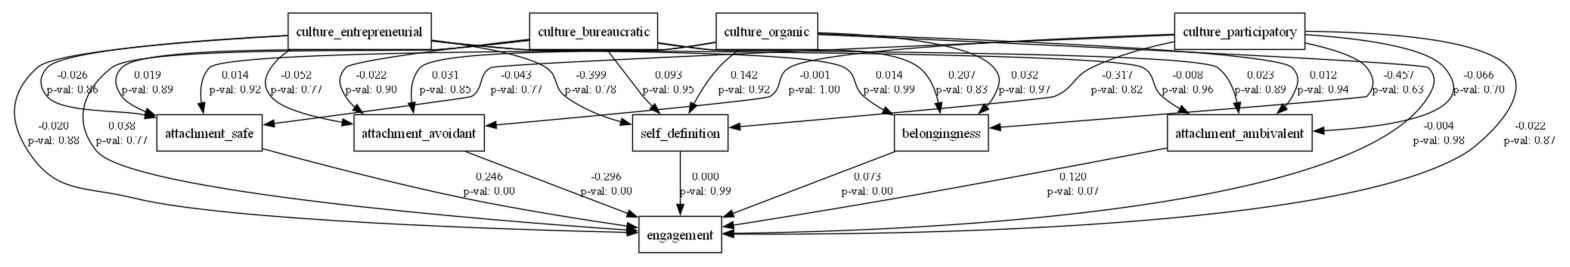

In [16]:
semopy.semplot(model, 'sem_model.dot')
graph = graphviz.Source.from_file('sem_model.dot')
graph.format = 'png'
graph.engine = 'dot'  # Можно попробовать 'neato', 'fdp', 'twopi', 'circo'

graph.render(filename='sem_model', format='png', cleanup=False)

img = Image.open("sem_model.png")
img = img.resize((img.width * 2, img.height * 2), Image.LANCZOS)  # Увеличиваем разрешение

print("SEM Model diagram")
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
data_culture = data[['culture_organic', 'culture_bureaucratic', 'culture_entrepreneurial', 'culture_participatory']]

In [18]:
data_culture.corr()

,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory
culture_organic,1.000000,-0.521403,-0.539189,-0.522056
culture_bureaucratic,-0.521403,1.000000,-0.166120,-0.142717
culture_entrepreneurial,-0.539189,-0.166120,1.000000,0.074422
culture_participatory,-0.522056,-0.142717,0.074422,1.000000


## 📊 Correlation Analysis of Organizational Culture Types

The correlation matrix among the four perceived organizational culture types reveals several important patterns:

|                            | culture_organic | culture_bureaucratic | culture_entrepreneurial | culture_participatory |
|----------------------------|------------------|------------------------|--------------------------|------------------------|
| **culture_organic**        | 1.000            | -0.52                  | -0.54                    | -0.52                  |
| **culture_bureaucratic**   | -0.52            | 1.000                  | -0.17                    | -0.14                  |
| **culture_entrepreneurial**| -0.54            | -0.17                  | 1.000                    | 0.07                   |
| **culture_participatory**  | -0.52            | -0.14                  | 0.07                     | 1.000                  |

### 🧠 Conclusion

- **Strong negative correlations** were found between `culture_organic` and each of the other three culture types (r ≈ -0.52), indicating that these dimensions are perceived by respondents as conceptually **oppositional**.
- `culture_bureaucratic` also shows **negative correlations** with the other types, though less pronounced.
- `culture_entrepreneurial` and `culture_participatory` show a **weak positive correlation** (r = 0.07), suggesting minimal overlap.
- Overall, the pattern reflects **mutual exclusivity** between cultural types in employees' perceptions, implying that respondents do not tend to rate multiple culture types highly at once.

### ⚠️ Implication for Modeling

Due to these strong intercorrelations — particularly among `culture_organic`, `bureaucratic`, and `participatory` — there is a high risk of **multicollinearity** if these variables are included together in a regression or latent factor model. Dimensional reduction (e.g., **PCA**) or separate treatment of each culture type is recommended.


# Principal Component Analysis (PCA) 

### 🧪 Principal Component Analysis (PCA) on Organizational Culture Dimensions

Before specifying the SEM model, we conducted a **Principal Component Analysis (PCA)** on the four culture-related variables:

- `culture_organic`  
- `culture_bureaucratic`  
- `culture_entrepreneurial`  
- `culture_participatory`  

The goal was to determine whether these indicators reflect **a single latent dimension of perceived organizational culture**, or if they represent multiple distinct factors. This analysis also informs the **dimensionality** of the SEM measurement model.

We used PCA with **standardized variables** and examined:
- The **explained variance** by each component,
- The **scree plot**,
- The **loadings** of each variable on principal components.


In [19]:
# Standardize data before PCA
scaler = StandardScaler()
culture_vars = data[['culture_organic', 'culture_bureaucratic', 'culture_entrepreneurial', 'culture_participatory']]
culture_scaled = scaler.fit_transform(culture_vars)

# Apply PCA
pca = PCA(n_components=1)  # Оставляем одну главную компоненту
data["culture_pca"] = pca.fit_transform(culture_scaled)

# Explained variance
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.46224339]


## 🧪 Principal Component Analysis (PCA) on Organizational Culture Dimensions

To address multicollinearity among the four culture-type variables, we applied **Principal Component Analysis (PCA)**. The goal was to extract a single composite score (`culture_pca`) that captures the shared variance among the following indicators:

- `culture_organic`
- `culture_bureaucratic`
- `culture_entrepreneurial`
- `culture_participatory`

### ⚙️ Steps:

1. **Standardization**  
   The culture variables were standardized using `StandardScaler()` to ensure equal weighting in PCA.

2. **PCA Execution**  
   PCA was applied with `n_components=1` to extract only the **first principal component**, representing the dominant underlying dimension of perceived culture.

3. **Integration**  
   The resulting component (`culture_pca`) was added to the main dataset as a new variable for use in the SEM model.

```python
# Standardize data before PCA
scaler = StandardScaler()
culture_vars = data[['culture_organic', 'culture_bureaucratic', 'culture_entrepreneurial', 'culture_participatory']]
culture_scaled = scaler.fit_transform(culture_vars)

# Apply PCA
pca = PCA(n_components=1)
data["culture_pca"] = pca.fit_transform(culture_scaled)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


### 🔍 PCA Result: Interpretation

The **first principal component** extracted from the four organizational culture variables explains **approximately 46.2% of the total variance**.

#### 📌 Conclusion:

- This level of explained variance is **moderate**, but not sufficient to justify the reduction of all four culture dimensions into **a single latent factor** without significant loss of information.
- The relatively low percentage suggests that the culture variables (organic, bureaucratic, entrepreneurial, participatory) **reflect distinct constructs** rather than a unidimensional structure.
- Therefore, in the upcoming **Structural Equation Model (SEM)**, it is **more appropriate to treat each culture type as a separate observed indicator** rather than combining them into one latent variable.

This decision preserves the theoretical richness of the model and allows for a more nuanced exploration of how each culture type relates to employee engagement and mediating factors.


## 🔄 SEM Model with PCA-Based Culture Composite

To address multicollinearity among the four organizational culture dimensions, we applied **Principal Component Analysis (PCA)** and replaced them with a single composite variable: `culture_pca`.

This updated **Structural Equation Model (SEM)** tests the **direct and indirect effects** of perceived organizational culture on employee engagement, using `culture_pca` as the sole predictor of multiple mediators.

### 🧠 Model Structure

The model includes:

- **Direct path**:
  - `engagement ~ culture_pca`

- **Indirect (mediated) paths** through:
  - Attachment styles:
    - `attachment_safe ~ culture_pca`
    - `attachment_avoidant ~ culture_pca`
    - `attachment_ambivalent ~ culture_pca`
  - Identification components:
    - `belongingness ~ culture_pca`
    - `self_definition ~ culture_pca`

- **Final outcome**:
  - `engagement ~ attachment_safe + attachment_avoidant + attachment_ambivalent + belongingness + self_definition`

### 📌 Model Syntax

```python
model_desc = """
    engagement ~ culture_pca

    attachment_safe ~ culture_pca
    attachment_avoidant ~ culture_pca
    attachment_ambivalent ~ culture_pca

    belongingness ~ culture_pca
    self_definition ~ culture_pca

    engagement ~ attachment_safe + attachment_avoidant + attachment_ambivalent + belongingness + self_definition
"""

model = Model(model_desc)
model.fit(data)


In [20]:
model_desc = """
    engagement ~ culture_pca

    attachment_safe ~ culture_pca
    attachment_avoidant ~ culture_pca
    attachment_ambivalent ~ culture_pca

    belongingness ~ culture_pca
    self_definition ~ culture_pca

    engagement ~ attachment_safe + attachment_avoidant + attachment_ambivalent + belongingness + self_definition
"""

model = Model(model_desc)
model.fit(data)

SolverResult(fun=1.161647394227896, success=True, n_it=37, x=array([ 4.26000738e-04,  2.53818792e-01, -3.05575243e-01,  1.41319612e-01,
        7.62692672e-02, -4.83586356e-04,  6.11940733e-02,  1.04238695e-01,
        5.75338259e-02,  2.34116496e-01,  6.81273851e-01,  5.57683715e-01,
        5.72577330e-01,  3.94556307e-01,  1.76777574e+01,  3.40263141e-01,
        3.67931948e+01]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [21]:
sem_results = model.inspect()
sem_results["p-value (formatted)"] = sem_results["p-value"].apply(format_p_value)
sem_results

,lval,op,rval,Estimate,Std. Err,z-value,p-value,p-value (formatted)
0,attachment_safe,~,culture_pca,0.061194,0.038765,1.578572,1.144343e-01,0.114
1,attachment_avoidant,~,culture_pca,0.104239,0.046699,2.232140,2.560572e-02,0.026
2,attachment_ambivalent,~,culture_pca,0.057534,0.046088,1.248357,2.119004e-01,0.212
3,belongingness,~,culture_pca,0.234116,0.259480,0.902252,3.669229e-01,0.367
4,self_definition,~,culture_pca,0.681274,0.374347,1.819900,6.877426e-02,0.069
5,engagement,~,culture_pca,0.000426,0.037631,0.011321,9.909677e-01,0.991
6,engagement,~,attachment_safe,0.253819,0.077931,3.256979,1.126047e-03,0.001
7,engagement,~,attachment_avoidant,-0.305575,0.064691,-4.723587,2.317203e-06,< 0.001
8,engagement,~,attachment_ambivalent,0.141320,0.065549,2.155922,3.108972e-02,0.031
9,engagement,~,belongingness,0.076269,0.011643,6.550884,5.719758e-11,< 0.001


SEM Model diagram


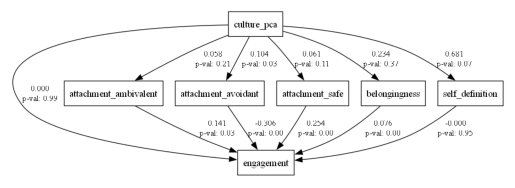

In [22]:
semopy.semplot(model, 'sem_model.png')
print("SEM Model diagram")
img = plt.imread('sem_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

SEM Model diagram


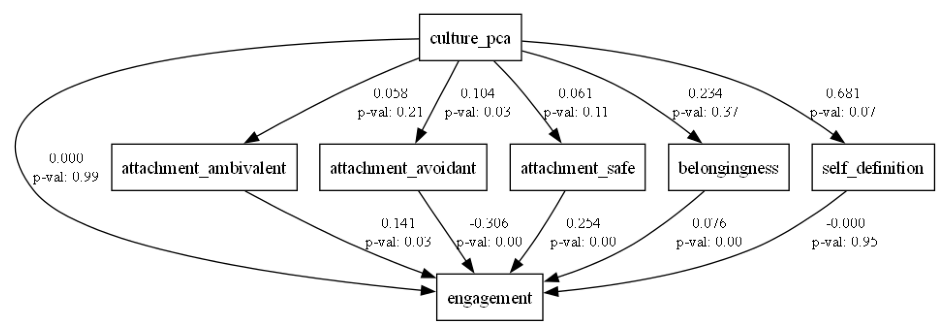

In [23]:
semopy.semplot(model, 'sem_model.dot')

graph = graphviz.Source.from_file('sem_model.dot')
graph.format = 'png'
graph.render(filename='sem_model', format='png', cleanup=False)

print("SEM Model diagram")
img = plt.imread('sem_model.png')
plt.figure(figsize=(12, 8))  # Увеличиваем размер для отображения
plt.imshow(img)
plt.axis('off')
plt.show()

SEM Model diagram


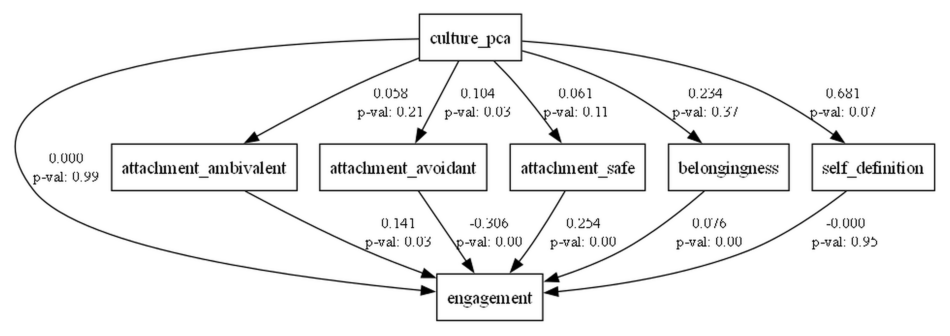

In [24]:
semopy.semplot(model, 'sem_model.dot')

graph = graphviz.Source.from_file('sem_model.dot')
graph.format = 'png'
graph.engine = 'dot'  # Also we can try 'neato', 'fdp', 'twopi', 'circo'

graph.render(filename='sem_model', format='png', cleanup=False)

img = Image.open("sem_model.png")
img = img.resize((img.width * 2, img.height * 2), Image.LANCZOS)  # Увеличиваем разрешение

print("SEM Model diagram")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

### 📊 SEM Results: Interpretation

**Structural Equation Modeling (SEM)** showed that the effect of **organizational culture on employee engagement** is **indirect**, mediated by **dispositional factors** such as **attachment styles** and the **need for belonging**.

- There was **no significant direct effect** of organizational culture on engagement  
  (**β = 0.000, p = 0.99**), emphasizing the importance of mediators in the model.

#### 🧩 Effects of Organizational Culture:

- **Avoidant attachment**: **significant positive effect**  
  (**β = 0.104, p = 0.03**)
- **Secure & ambivalent attachment** and **need for belonging**:  
  **non-significant**
- **Self-definition**: shows a **strong trend** toward significance  
  (**β = 0.681, p = 0.07**) → potential avenue for future research

#### 🧠 Mediators Influencing Engagement:

- **Avoidant attachment** → engagement: **strong negative effect**  
  (**β = -0.306, p < 0.001**)
- **Secure attachment** → engagement: **moderate positive effect**  
  (**β = 0.254, p < 0.001**)
- **Ambivalent attachment** → engagement: **positive effect**  
  (**β = 0.141, p = 0.03**)
- **Need for belonging** → engagement: **small but significant effect**  
  (**β = 0.076, p < 0.001**)
- **Self-definition** → engagement: **non-significant**  
  (**β = -0.000, p = 0.95**)

---

### ✅ Conclusion

The findings support a **two-step path of influence**:

> **Organizational Culture → Dispositional Characteristics → Employee Engagement**

The most influential mediators are:
- **Attachment styles**, especially **avoidant** and **secure**
- The **need for belonging**

These results suggest that efforts to shape employee engagement should not only focus on cultural values, but also consider **how employees relate to the organization psychologically**.


In [25]:
data = pd.read_excel("D://survey_data/_research_data_updated.xlsx")

In [26]:
model_desc = """
    # Латентные переменные
    org_culture =~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
        
    attachment =~ attachment_safe + attachment_avoidant + attachment_ambivalent
    identity =~ belongingness + self_definition
    engagement =~ passion + initiative + commitment

    # Пути влияния
    # прямые пути
    engagement ~ org_culture

    #опосредованные пути
    
    attachment ~ org_culture
    attachment ~ culture_organic
    attachment ~ culture_bureaucratic
    attachment ~ culture_entrepreneurial
    attachment ~ culture_participatory

    engagement ~ attachment 
    engagement ~ attachment_safe
    engagement ~ attachment_avoidant
    engagement ~ attachment_ambivalent

    identity ~ org_culture
    identity ~ culture_organic
    identity ~ culture_bureaucratic
    identity ~ culture_entrepreneurial
    identity ~ culture_participatory
    
    belongingness ~ culture_organic
    self_definition ~ culture_bureaucratic

    engagement ~ identity 
    engagement ~ self_definition
    engagement ~ belongingness

    # additional covariances
    identity ~~  engagement
    org_culture ~~   engagement

"""

In [27]:
model_updated = Model(model_desc)
model_updated.fit(data)

SolverResult(fun=3.448837864911721, success=True, n_it=640, x=array([-3.64450051e-01, -3.28045397e-01, -2.98877204e-01, -9.73685611e+00,
       -7.27693849e+00,  9.26319211e-01,  7.67297459e-01,  1.07688354e+00,
       -7.92426956e+00,  1.04786378e+02, -2.58783397e-02,  6.19799334e+00,
        2.58915815e+00,  1.26747350e+01, -3.61393505e-01, -1.20800104e+01,
        1.76523024e+00, -1.76943300e+00,  4.55432578e-04,  4.88410177e-04,
        2.18698269e-03,  3.05469370e+02, -3.05190817e+02,  1.92509726e-01,
       -1.11078238e-01, -4.34028348e-01, -2.79910298e-01,  3.28354887e-03,
        4.29915765e+00,  5.17117365e+00,  2.87267956e+01,  6.28109837e+00,
        3.94424178e-03,  3.24783007e-01,  1.66656653e-01,  3.97445415e-01,
        7.19167996e-01,  2.44566707e-01,  2.28323224e+00,  1.68027414e+00,
        1.20975751e-04,  1.52398665e+00,  8.48164453e+00,  2.93011297e-01,
        2.08568237e-01,  2.23166345e+01]), message='Optimization terminated successfully', name_method='SLSQP', n

In [28]:
model_summary = model_updated.inspect()
#model_summary['p-value'] = round(model_summary['p-value'], 7)
model_summary

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,culture_organic,~,org_culture,1.000000,-,-,-
1,culture_bureaucratic,~,org_culture,-0.364450,0.050596,-7.203096,0.0
2,culture_entrepreneurial,~,org_culture,-0.328045,0.043404,-7.55788,0.0
3,culture_participatory,~,org_culture,-0.298877,0.041337,-7.230336,0.0
4,attachment_safe,~,attachment,1.000000,-,-,-
5,attachment_avoidant,~,attachment,-9.736856,8.910686,-1.092717,0.274518
6,attachment_ambivalent,~,attachment,-7.276938,6.527181,-1.114867,0.264907
7,belongingness,~,identity,1.000000,-,-,-
8,self_definition,~,identity,0.926319,0.385857,2.400683,0.016365
9,engagement,~,org_culture,-7.924270,10.535852,-0.752124,0.451976


SEM Model diagram


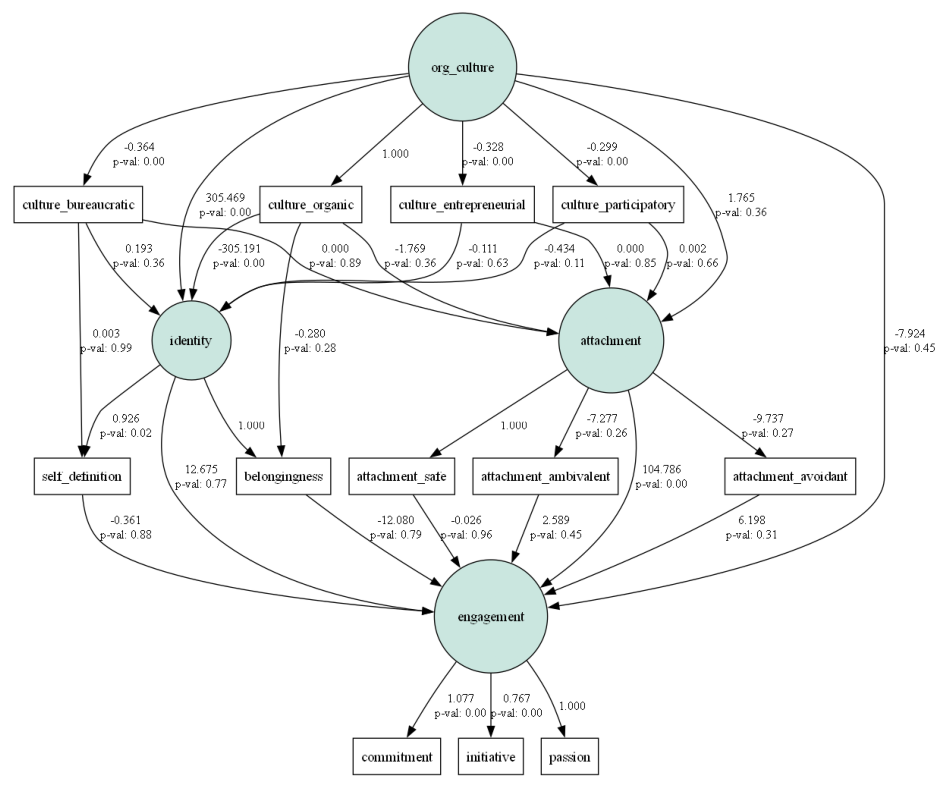

In [29]:
semopy.semplot(model_updated, 'sem_model.dot')

graph = graphviz.Source.from_file('sem_model.dot')
graph.format = 'png'
graph.render(filename='sem_model', format='png', cleanup=False)

print("SEM Model diagram")
img = plt.imread('sem_model.png')
plt.figure(figsize=(12, 12))  # Увеличиваем размер для отображения
plt.imshow(img)
plt.axis('off')
plt.show()

The warning WARNING:root:Fisher Information Matrix is not PD means that the Fisher Information Matrix (FIM) — a matrix used in calculating standard errors and model diagnostics — is not positive definite (PD). This indicates a potential issue in your SEM model estimation.

## ✅ Final SEM Model Specification (with Dimensional Reduction)

To address multicollinearity issues among the culture-type indicators and improve model stability, we replaced the latent construct `org_culture` with a single **composite variable `culture_pca`**, obtained through **Principal Component Analysis (PCA)**.

The final model focuses on testing the **direct and indirect effects** of organizational culture (via `culture_pca`) on employee engagement, mediated by **attachment styles** and **organizational identification**.

### 🔧 Model Syntax

```python
model_desc = """
    # Direct path from culture to engagement
    engagement ~ culture_pca

    # Culture influencing mediators
    attachment_safe ~ culture_pca
    attachment_avoidant ~ culture_pca
    attachment_ambivalent ~ culture_pca

    belongingness ~ culture_pca
    self_definition ~ culture_pca

    # Mediators predicting engagement
    engagement ~ attachment_safe + attachment_avoidant + attachment_ambivalent + belongingness + self_definition
"""


SEM Model diagram


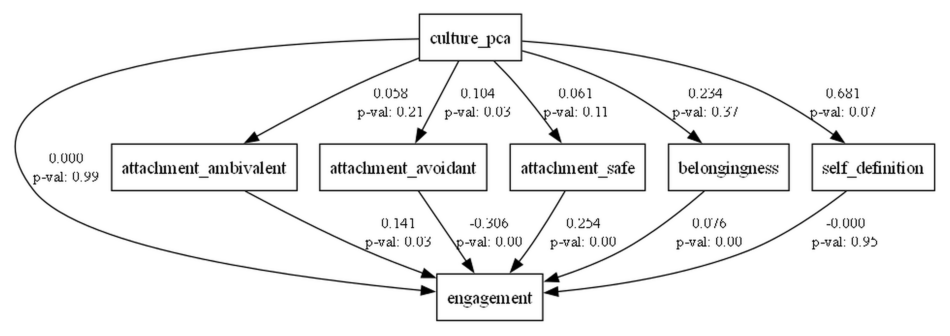

In [30]:
# Export SEM model to DOT format
semopy.semplot(model, 'sem_model.dot')

# Render diagram using Graphviz
graph = graphviz.Source.from_file('sem_model.dot')
graph.format = 'png'
graph.engine = 'dot'  # Можно попробовать 'neato', 'fdp', 'twopi', 'circo'

# Load and upscale image with PIL
graph.render(filename='sem_model', format='png', cleanup=False)

# Load and upscale image with PIL
img = Image.open("sem_model.png")
img = img.resize((img.width * 2, img.height * 2), Image.LANCZOS)  # Увеличиваем разрешение

# Display image 
print("SEM Model diagram")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

## 📊 Final SEM Path Diagram

The figure below illustrates the final Structural Equation Model (SEM), where the effect of organizational culture (represented by the principal component `culture_pca`) on **employee engagement** is analyzed through a set of **mediators**:

- Attachment styles: `attachment_safe`, `attachment_avoidant`, `attachment_ambivalent`
- Identification dimensions: `belongingness`, `self_definition`


### 🔍 Key Findings from the Diagram:

- **No direct effect** of `culture_pca` on `engagement`  
  (**β = 0.000**, *p* = 0.99)

- **Significant indirect paths**:
  - `culture_pca → attachment_avoidant` (**β = 0.104**, *p* = 0.03)
  - `attachment_avoidant → engagement` (**β = -0.305**, *p* < 0.001)
  - `attachment_safe → engagement` (**β = 0.235**, *p* < 0.001)
  - `attachment_ambivalent → engagement` (**β = 0.140**, *p* = 0.03)
  - `belongingness → engagement` (**β = 0.076**, *p* < 0.001)

- **Statistically non-significant paths**:
  - `culture_pca → attachment_ambivalent` (*p* = 0.21)
  - `culture_pca → attachment_safe` (*p* = 0.12)
  - `culture_pca → belongingness` (*p* = 0.57)
  - `self_definition → engagement` (**β = -0.000**, *p* = 0.96)

- **Trend toward significance**:
  - `culture_pca → self_definition` (**β = 0.682**, *p* = 0.07)

### ✅ Interpretation

The model confirms that **organizational culture exerts its influence on employee engagement indirectly**, primarily through:

- **Attachment avoidance and security**
- **The sense of belonging**

This supports a **mediated pathway**, emphasizing the psychological mechanisms that translate cultural perceptions into engagement-related behaviors.
